<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/main/HW12_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from heapq import nlargest
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:

text = """
The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP)
in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion
C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A,
Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running
American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs,
the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station.
Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters;
she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger
and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle
to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing
missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related
mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven
total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange
of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson
Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged,
hypersonic,cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials
that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal
Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use,
ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first
two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,”
having regularly flown at twenty-five times the speed of sound."""
text


'\nThe Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) \nin the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion\nC in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A,\nDiscovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running \nAmerican space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs,\nthe SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station.\nIncluding her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters;\nshe was also the first orbiter to fly t

In [14]:

nlp = spacy.load('en_core_web_sm')

In [15]:

# Токенізація
doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)

['\n', 'The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'National', 'Register', 'of', 'Historic', 'Places', '(', 'NRHP', ')', '\n', 'in', 'the', 'context', 'of', 'the', 'U.S.', 'Space', 'Shuttle', 'Program', '(', '1969', '-', '2011', ')', 'under', 'Criterion', 'A', 'in', 'the', 'areas', 'of', 'Space', 'Exploration', 'and', 'Transportation', 'and', 'under', 'Criterion', '\n', 'C', 'in', 'the', 'area', 'of', 'Engineering', '.', 'Because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', ',', 'Criteria', 'Consideration', 'G', 'applies', '.', 'Under', 'Criterion', 'A', ',', '\n', 'Discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'Space', 'Shuttle', 'Program', '(', 'SSP', ')', ',', 'the', 'longest', 'running', '\n', 'American', 'space', 'program', 'to', 'date', ';', 'she', 'was', 'the', 'third', 'of', '

In [16]:
tokens = word_tokenize(text)
sentences = sent_tokenize(text)
sentences

['\nThe Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) \nin the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion\nC in the area of Engineering.',
 'Because it has achieved significance within the past fifty years, Criteria Consideration G applies.',
 'Under Criterion A,\nDiscovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running \nAmerican space program to date; she was the third of five orbiters built by NASA.',
 'Unlike the Mercury, Gemini, and Apollo programs,\nthe SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station.',
 'Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters;\nshe was also the first 

In [23]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [18]:
stop_words = set(stopwords.words('english'))

punctuations = string.punctuation + "\n"

In [19]:
word_frequencies = {}

for word in doc:

  if word.text.lower() not in stop_words and word.text.lower() not in punctuations:

    if word.text not in word_frequencies.keys():
      word_frequencies[word.text] = 1
    else:
      word_frequencies[word.text] += 1


In [20]:
select_length = int(len(sentences))

summary = nlargest(select_length, word_frequencies, key = word_frequencies.get)

summary


['Space',
 'first',
 'Discovery',
 'Shuttle',
 'orbiter',
 'Criterion',
 'missions',
 'space',
 'five',
 'flew',
 'also',
 'fly',
 'reusable',
 'U.S.',
 'Program',
 'C']

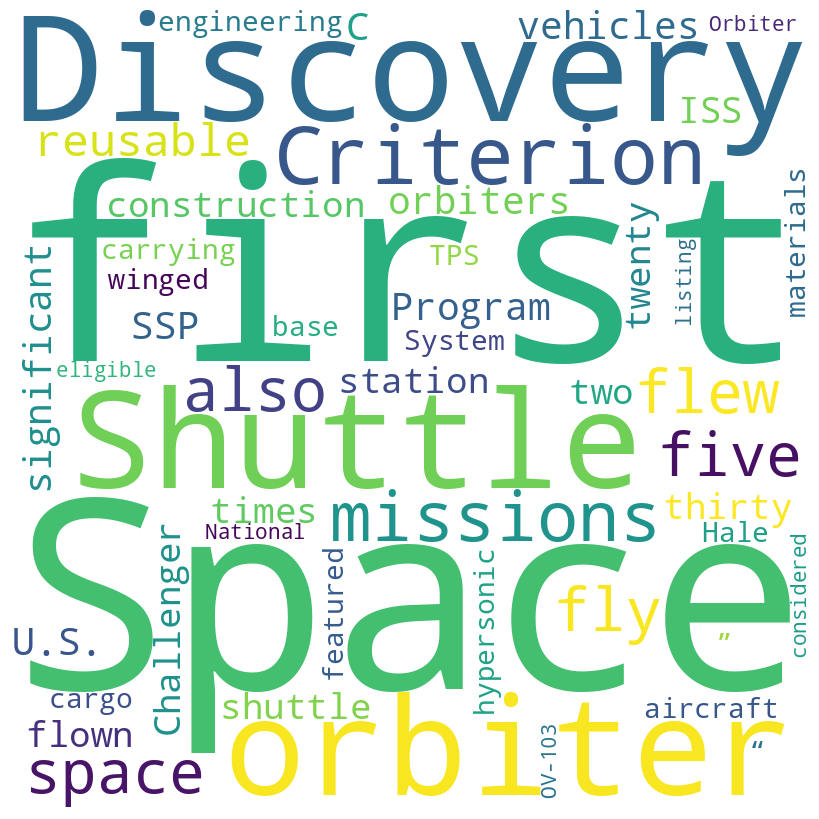

In [24]:
# Generating the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(word_frequencies)

# Plotting the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:

sentence_scores = {}
for sentence in sentences:
    for word, freq in word_frequencies.items():
        if word in sentence.lower():
            if sentence not in sentence_scores.keys():
                sentence_scores[sentence] = freq
            else:
                sentence_scores[sentence] += freq


select_length = int(len(sentences)*0.3)
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
summary

['According to Wayne Hale, a flight director from Johnson\nSpace Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged,\nhypersonic,cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials \nthat both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal \nProtection System (TPS) materials.',
 'Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters;\nshe was also the first orbiter to fly twenty missions.',
 'The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use,\nablative heat shield.',
 'As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” \nhaving regularly flown at